### Choosing the Right Metric


<center>

</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

### Data Source
Downloaded as .data filand loaded as CSV
https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

In [19]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")


In [20]:
# fetch dataset 
blood_data = pd.read_csv('data/transfusion.data', delimiter=",")
#fetch_ucirepo(id=176) 
print(blood_data)
  
# data (as pandas dataframes) 
X, y = blood_data.drop('whether he/she donated blood in March 2007', axis = 1), blood_data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify = default.default)

#X_train.info()
#y_train.info()
#X_test.info()
#y_test.info()
# metadata 
#print(blood_transfusion_service_center.metadata) 
  
# variable information 
#print(blood_transfusion_service_center.variables) 

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  


# First pipeline, k=10

In [44]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10))])

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [45]:
preds = knn_pipe.predict(X_test)
test_mse = mean_squared_error(y_test, preds)
print(test_mse)

0.26737967914438504


# Grid Search to Optimize k

In [48]:
params = {'knn__n_neighbors': range(1, len(y_test), 2)}
knn_grid = GridSearchCV(knn_pipe, param_grid=params)
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']

print(f'The best value of k is: {best_k}')

The best value of k is: 19


### Plot of Grid Search CV Results
mean test score vs. k

The best value of k is: 19


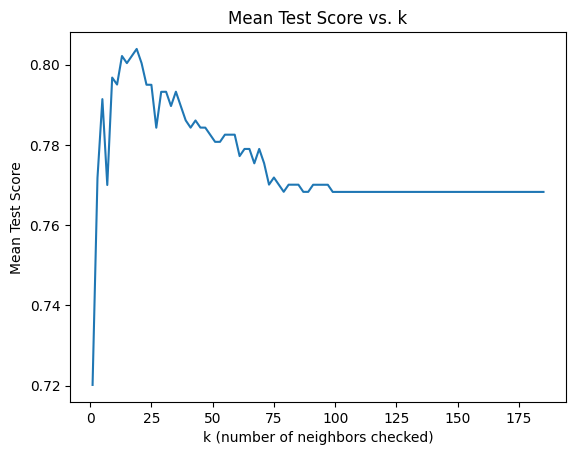

In [49]:
yaxis = knn_grid.cv_results_['mean_test_score']
xaxis = range(1, len(y_test), 2)

plt.plot(xaxis,yaxis)
plt.title('Mean Test Score vs. k')
plt.xlabel('k (number of neighbors checked)')
plt.ylabel('Mean Test Score')
print(f'The best value of k is: {best_k}')

# Second pipeline, k=19

In [50]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=19))])
knn_pipe.fit(X_train, y_train)

preds = knn_pipe.predict(X_test)

test_mse = mean_squared_error(y_test, preds)
print(f'Test Mean Squared Error: {test_mse}')
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")


Test Mean Squared Error: 0.22994652406417113
Precision: 0.6190476190476191
Recall: 0.2708333333333333


# Confusion Matrices

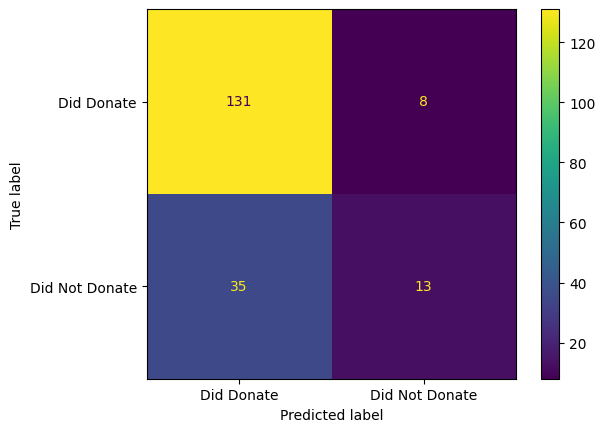

In [52]:
conf_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Did Donate', 'Did Not Donate'])
disp.plot()
plt.show()

In [34]:
thresh=0.6
probability_preds = knn_pipe.predict_proba(X_test)
print(probability_preds)
preds = np.where(probability_preds[:,1] >= thresh)
print(preds)
print(len(probability_preds))
print(len(preds))
print(len(y_test))

[[0.9 0.1]
 [0.8 0.2]
 [0.3 0.7]
 [0.8 0.2]
 [1.  0. ]
 [0.7 0.3]
 [1.  0. ]
 [0.9 0.1]
 [0.4 0.6]
 [0.9 0.1]
 [0.3 0.7]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [0.6 0.4]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.7 0.3]
 [0.6 0.4]
 [0.9 0.1]
 [0.9 0.1]
 [0.3 0.7]
 [0.7 0.3]
 [0.7 0.3]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [0.3 0.7]
 [0.6 0.4]
 [0.7 0.3]
 [0.8 0.2]
 [1.  0. ]
 [0.3 0.7]
 [0.9 0.1]
 [0.3 0.7]
 [1.  0. ]
 [0.9 0.1]
 [0.3 0.7]
 [0.9 0.1]
 [0.7 0.3]
 [0.9 0.1]
 [1.  0. ]
 [0.5 0.5]
 [0.9 0.1]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [0.8 0.2]
 [0.5 0.5]
 [0.8 0.2]
 [0.9 0.1]
 [0.3 0.7]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [0.7 0.3]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.6 0.4]
 [0.7 0.3]
 [1.  0. ]
 [0.9 0.1]
 [0.9 0.1]
 [0.8 0.2]
 [0.7 0.3]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.9 0.1]
 [0.7 0.3]
 [0.7 0.3]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.3 0.7]
 [0.7 0.3]

In [25]:


#Function to return the precision and recall for the passed threshold value

def precision_thresh(predictions, y_test, thresh):
    
    preds = np.where(predictions >= thresh)
    
    return precision_score(y_test, preds), recall_score(y_test, preds)

#for num in np.linspace(0,1,11):
#    print(precision_thresh(preds, y_test, num))

thresholds = np.arange(0, 1, .1)
thresholds

precision_thresh(probability_preds[:, 1],y_test,0.6)
#results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(preds[:, 1], y_test, i) for i in thresholds]})


ValueError: Found input variables with inconsistent numbers of samples: [187, 1]

In [ ]:
def precision_thresh(predictions, y_test, thresh):
    
    #preds = np.where(predictions >= thresh)
    return precision_score(y_test, preds), recall_score(y_test, preds)


precision_thresh(preds,y_test,0.6)

#for num in np.linspace(0,1,11):
#    print(precision_thresh(preds, y_test, num))